In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan_data.csv')
df.head(5)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1


In [ ]:
print("The shape of data is:", df.shape)


The shape of data is: (37066, 14)


In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37066 entries, 0 to 37065
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      37066 non-null  int64  
 1   purpose            37066 non-null  object 
 2   int_rate           37066 non-null  float64
 3   installment        37066 non-null  float64
 4   log_annual_inc     37066 non-null  float64
 5   dti                36966 non-null  float64
 6   fico               37066 non-null  int64  
 7   days_with_cr_line  37066 non-null  int64  
 8   revol_bal          37066 non-null  int64  
 9   revol_util         37054 non-null  float64
 10  inq_last_6mths     37066 non-null  int64  
 11  delinq_2yrs        37032 non-null  float64
 12  pub_rec            37066 non-null  int64  
 13  not_fully_paid     37066 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 4.0+ MB


In [ ]:
df.isna().sum()

credit_policy          0
purpose                0
int_rate               0
installment            0
log_annual_inc         0
dti                  100
fico                   0
days_with_cr_line      0
revol_bal              0
revol_util            12
inq_last_6mths         0
delinq_2yrs           34
pub_rec                0
not_fully_paid         0
dtype: int64

In [ ]:
df_not_nan = df[df['dti'].notna()]
df_not_nan = df_not_nan[df_not_nan['revol_util'].notna()]
df_not_nan = df_not_nan[df_not_nan['delinq_2yrs'].notna()]
df_not_nan

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,1,debt_consolidation,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1
37062,1,debt_consolidation,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1
37063,1,small_business,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1
37064,1,debt_consolidation,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1


In [ ]:
df_not_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36920 entries, 0 to 37065
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      36920 non-null  int64  
 1   purpose            36920 non-null  object 
 2   int_rate           36920 non-null  float64
 3   installment        36920 non-null  float64
 4   log_annual_inc     36920 non-null  float64
 5   dti                36920 non-null  float64
 6   fico               36920 non-null  int64  
 7   days_with_cr_line  36920 non-null  int64  
 8   revol_bal          36920 non-null  int64  
 9   revol_util         36920 non-null  float64
 10  inq_last_6mths     36920 non-null  int64  
 11  delinq_2yrs        36920 non-null  float64
 12  pub_rec            36920 non-null  int64  
 13  not_fully_paid     36920 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 4.2+ MB


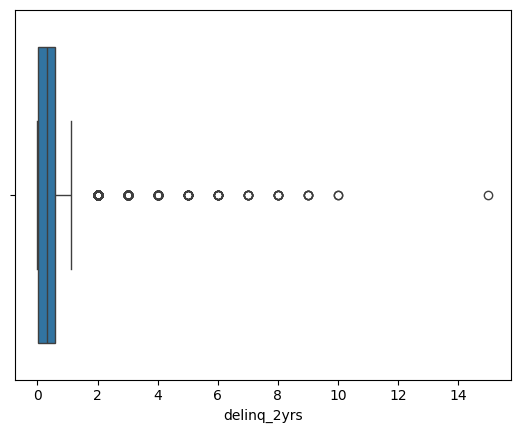

In [ ]:
sns.boxplot(x = df_not_nan.delinq_2yrs);

In [ ]:
df_not_nan = df_not_nan.drop('purpose',axis = 1)
df_not_nan = df_not_nan.drop('credit_policy',axis = 1)
df_not_nan

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0
1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0
2,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0
3,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0
4,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
37061,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1
37062,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1
37063,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1
37064,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1


In [ ]:
df_not_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36920 entries, 0 to 37065
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   int_rate           36920 non-null  float64
 1   installment        36920 non-null  float64
 2   log_annual_inc     36920 non-null  float64
 3   dti                36920 non-null  float64
 4   fico               36920 non-null  int64  
 5   days_with_cr_line  36920 non-null  int64  
 6   revol_bal          36920 non-null  int64  
 7   revol_util         36920 non-null  float64
 8   inq_last_6mths     36920 non-null  int64  
 9   delinq_2yrs        36920 non-null  float64
 10  pub_rec            36920 non-null  int64  
 11  not_fully_paid     36920 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 3.7 MB


In [ ]:
X = df_not_nan.drop(columns=['not_fully_paid'])
Y = df_not_nan['not_fully_paid']
print(X.shape)
print(Y.shape)

(36920, 11)
(36920,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 42,test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
my_tree_en = DecisionTreeClassifier(criterion='entropy', random_state=0)
my_tree_en.fit(X_train.values,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
Y_pred_en = my_tree_en.predict(X_test.values)
Y_pred_en

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
a = my_tree_en.predict([[0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0]])
print(a)

[0]


In [ ]:
pd.DataFrame({'Y':Y_test,'Y_pred_en':Y_pred_en})

,Y,Y_pred_en
35087,1,1
29444,1,1
31294,1,1
15862,1,1
12812,1,1
...,...,...
11478,1,1
27270,1,1
26928,1,1
7,1,0


In [ ]:
cm = confusion_matrix(Y_test,Y_pred_en)
cm

array([[1145,  948],
       [ 949, 4342]])

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred_en)

0.8207163784141386

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_en)))

Model accuracy score with criterion entropy: 0.7431


In [ ]:
print('Training set score: {:.4f}'.format(my_tree_en.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(my_tree_en.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 0.7431


In [ ]:
my_tree_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
my_tree_gini.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
Y_pred_gini = my_tree_gini.predict(X_test)

In [ ]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_gini)))

Model accuracy score with criterion gini index: 0.7365


In [ ]:
f1_score(Y_test, Y_pred_gini)

0.8156498673740054

In [ ]:
print('Training set score: {:.4f}'.format(my_tree_gini.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(my_tree_gini.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 0.7365


In [ ]:
df_correlation_1 = df_not_nan.loc[df_not_nan.not_fully_paid == 0]
df_correlation_1

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0
1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0
2,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0
3,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0
24,0.206,524.23,90000.0,28.35,674,39356,55300,0.663,1,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19763,0.155,104.72,90000.0,0.97,664,37347,0,3.000,1609,0.171,0,0
19764,0.155,356.04,24000.0,28.75,684,41426,0,0.000,9785,0.730,0,0
19765,0.106,650.62,36480.0,10.26,744,42005,2,0.000,678,0.018,0,0
19766,0.155,601.20,64444.0,19.01,664,37377,0,0.000,605,0.028,1,0


In [ ]:
df_correlation_2 = df_not_nan.loc[df_not_nan.not_fully_paid == 1]
df_correlation_2

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
4,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1
5,0.170,893.73,115000.0,28.58,679,37803,60984,0.956,0,0.000,0,1
6,0.143,281.09,95000.0,18.51,749,36008,14083,0.156,0,0.000,0,1
7,0.110,435.05,20160.0,123.93,774,41365,353,0.007,1,0.000,0,1
8,0.088,1268.46,130000.0,20.09,704,37469,29208,0.507,0,0.000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
37061,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1
37062,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1
37063,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1
37064,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1


In [ ]:
df_correlation_2.describe()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,26775.000000,26775.000000,2.677500e+04,26775.000000,26775.000000,26775.000000,26775.000000,26775.000000,26775.000000,26775.000000,26775.000000,26775.0
mean,0.124784,458.982589,8.322456e+04,19.578623,712.529374,37533.468908,1925.367246,0.246294,14175.523623,0.401802,0.124743,1.0
std,0.049011,285.567081,9.228571e+04,18.543966,36.796744,2836.180232,9398.980384,0.720384,20388.500547,0.323805,0.335482,0.0
min,0.053000,30.510000,0.000000e+00,0.000000,664.000000,22920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.082000,248.710000,4.878800e+04,11.570000,684.000000,36192.000000,0.000000,0.000000,3429.000000,0.169000,0.000000,1.0
50%,0.117000,378.460000,7.000000e+04,17.890000,704.000000,38108.000000,0.000000,0.000000,9084.000000,0.370000,0.000000,1.0
75%,0.155000,621.760000,1.000000e+05,25.130000,734.000000,39295.000000,1.000000,0.000000,17875.500000,0.598000,0.000000,1.0
max,0.308000,1671.880000,9.300000e+06,999.000000,850.000000,42675.000000,302012.000000,23.000000,504547.000000,9.000000,5.000000,1.0


In [ ]:
df_correlation_1.describe()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,10145.000000,10145.000000,1.014500e+04,10145.000000,10145.000000,10145.000000,10145.000000,10145.000000,10145.000000,10145.000000,10145.000000,10145.0
mean,0.128789,467.326531,9.081881e+04,20.801682,714.770626,37774.285461,14093.806506,0.375558,4537.809561,0.270333,0.102021,0.0
std,0.048309,287.716528,8.938971e+04,13.943394,37.074696,2794.742177,22463.256867,0.475498,15234.092857,0.630651,0.311043,0.0
min,0.053000,30.890000,4.800000e+03,0.000000,664.000000,22251.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.088000,250.990000,5.200000e+04,12.820000,684.000000,36404.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.117000,392.980000,7.500000e+04,19.290000,709.000000,38322.000000,7751.000000,0.305000,1.000000,0.000000,0.000000,0.0
75%,0.161000,635.910000,1.070000e+05,26.370000,739.000000,39569.000000,19174.000000,0.580000,2375.000000,0.358000,0.000000,0.0
max,0.308000,1549.440000,3.991500e+06,288.960000,850.000000,42795.000000,504828.000000,15.000000,652794.000000,15.000000,4.000000,0.0
